<a href="https://colab.research.google.com/github/Jemuna/Image-Classification-Using-Deep-Learning-in-TensorFlow/blob/main/Image_Classification_Using_Deep_Learning_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Image Classification Using Deep Learning in TensorFlow"

In [ ]:
import tensorflow as tf
print("Version-TensorFlow",tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Version-TensorFlow 2.18.0


Loading the dataset


In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Building a ML model


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Converting CIFAR-10 to grayscale


In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)


In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train) / 255.0
x_test_gray = tf.image.rgb_to_grayscale(x_test) / 255.0
x_train_gray = tf.cast(x_train_gray, tf.float32)
x_test_gray = tf.cast(x_test_gray, tf.float32)
print(x_train_gray.shape, x_train_gray.dtype)
print(y_train.shape, y_train.dtype)
print(x_test_gray.shape, x_test_gray.dtype)
print(y_test.shape, y_test.dtype)



(50000, 32, 32, 1) <dtype: 'float32'>
(50000, 1) uint8
(10000, 32, 32, 1) <dtype: 'float32'>
(10000, 1) uint8


Reshaping the model


In [ ]:
y_train = tf.squeeze(y_train)
y_test = tf.squeeze(y_test)

Shape of the grayscale

In [ ]:
print(x_train_gray.shape)
print(x_test_gray.shape)


(50000, 32, 32, 1)
(10000, 32, 32, 1)


Converting y_train tensor into NumPy array

In [ ]:
print(y_train.numpy().min(), y_train.numpy().max())


0 9


Verify the model Input Shape

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,490 (517.54 KB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on grayscale images

In [ ]:
predictions = model(x_train_gray[:1]).numpy()
print(predictions)

[[-0.00156927 -0.00274851 -0.00295109 -0.00092793 -0.00110061 -0.00233303
  -0.00061515 -0.00363042  0.00029011  0.00297736]]


Softmax to get the probability

In [ ]:
probabilities=tf.nn.softmax(predictions).numpy()
print(probabilities)

[[0.099969   0.09985118 0.09983096 0.10003313 0.10001586 0.09989268
  0.10006443 0.09976316 0.10015506 0.10042456]]


Loss Function for training

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn)

<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x7dbbdf8614e0>, kwargs={'from_logits': True, 'ignore_class': None})>


Calculating the loss function for the first sample


In [ ]:
loss_fn(y_train[:1],predictions).numpy()

np.float32(2.301941)

Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train_gray)

Train and Evaluate the Model

In [ ]:
model.fit(datagen.flow(x_train_gray, y_train, batch_size=32),
          epochs=10,
          validation_data=(x_test_gray, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2803 - loss: 2.0077 - val_accuracy: 0.3167 - val_loss: 1.9341
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2813 - loss: 2.0075 - val_accuracy: 0.3234 - val_loss: 1.9260
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2801 - loss: 2.0050 - val_accuracy: 0.3191 - val_loss: 1.9217
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.2851 - loss: 2.0020 - val_accuracy: 0.3204 - val_loss: 1.9171
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2862 - loss: 1.9984 - val_accuracy: 0.3231 - val_loss: 1.9137
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.2822 - loss: 1.9941 - val_accuracy: 0.3263 - val_loss: 1.9086
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2879 - loss: 1.9870 - val_accuracy: 0.3276 - val_loss: 1.9016
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.2844 -

In [ ]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Activation('softmax')
])


In [ ]:
predictions = probability_model(x_test_gray[:5])
print(predictions.numpy())

[[0.08910042 0.04237944 0.17275777 0.08167352 0.18547606 0.07899647
  0.15485108 0.09266072 0.06759881 0.03450571]
 [0.04452088 0.22141336 0.00113848 0.00578181 0.0024971  0.00265206
  0.00068975 0.00532137 0.34694445 0.36904073]
 [0.09313387 0.12975803 0.00510543 0.01844364 0.00855608 0.0128843
  0.00194654 0.02737301 0.4314611  0.2713381 ]
 [0.21994907 0.07273706 0.09981316 0.0614977  0.04961005 0.06158595
  0.02773103 0.03723613 0.28671554 0.08312433]
 [0.05006137 0.02807684 0.11637416 0.15624294 0.18020315 0.14667183
  0.1595343  0.09426484 0.05120986 0.01736069]]


Visualizing the prediction


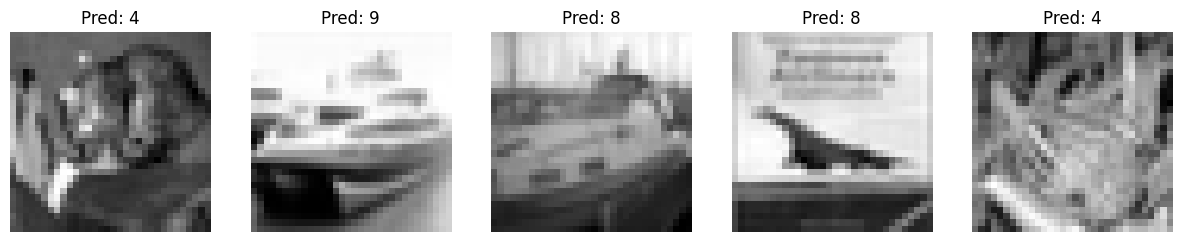

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
predictions = probability_model(x_test_gray[:5])  # Or use Option 2's probabilities
predicted_classes = np.argmax(predictions, axis=1)

# Plot images with their predicted labels
num_images = 5
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test_gray[i].numpy().squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()


Analysing Misclassification using Confusion Matrix

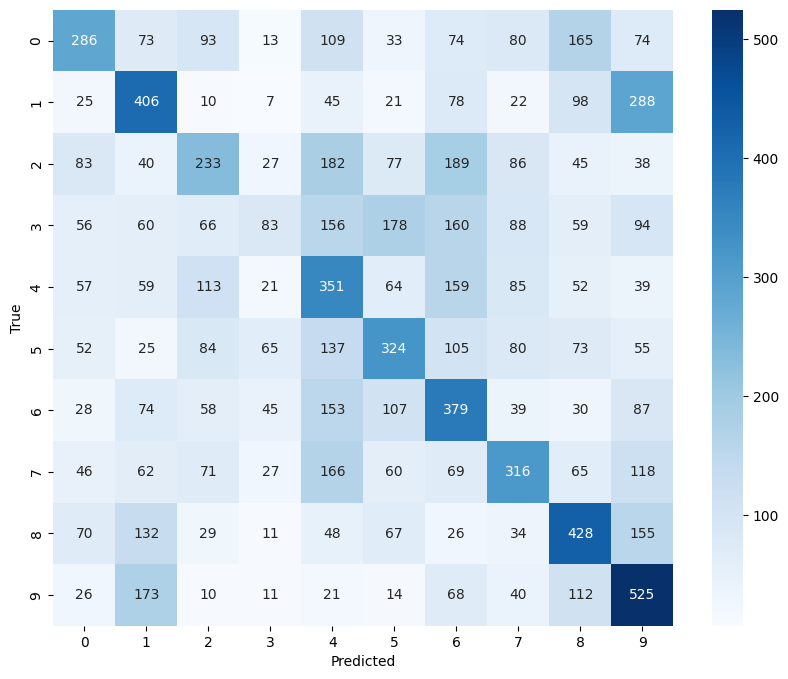

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_classes = np.argmax(probability_model(x_test_gray), axis=1)
cm = confusion_matrix(y_test.numpy().flatten(), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Accuracy and Loss Evaluation

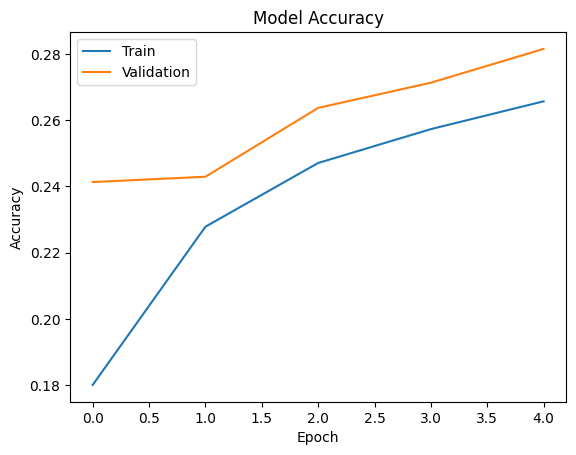

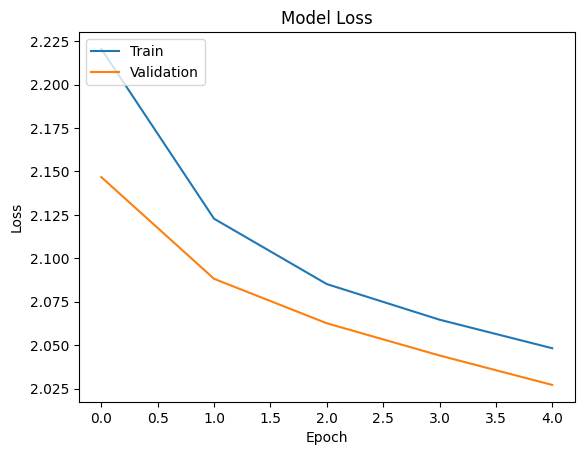

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.numpy().flatten(), predicted_classes))


              precision    recall  f1-score   support

           0       0.39      0.29      0.33      1000
           1       0.37      0.41      0.39      1000
           2       0.30      0.23      0.26      1000
           3       0.27      0.08      0.13      1000
           4       0.26      0.35      0.30      1000
           5       0.34      0.32      0.33      1000
           6       0.29      0.38      0.33      1000
           7       0.36      0.32      0.34      1000
           8       0.38      0.43      0.40      1000
           9       0.36      0.53      0.42      1000

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.32     10000
weighted avg       0.33      0.33      0.32     10000

